Now we want to write the Kitaev Honeycomb Lattice Hamiltonian using Fermionic notation

In [209]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy import sparse

import Class_site as site
import importlib
importlib.reload(site)

<module 'Class_site' from '/Users/giovanniconcheri/Desktop/TESI/MasterThesis/Class_site.py'>

In [210]:
Npx = 3 # Number of plaquette in each dimension
Npy = 4
model = site.SitesOBC(Npx, Npy)

In [211]:
print("Number of sites:", model.Nsites)
print("array of ordered sites: ", model.ids)
print(model.Nxsites_1)
print(model.Nxsites_2)
print(model.Nyrows)
print(model.partition)

Number of sites: 38
array of ordered sites:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
7
8
5
['A' 'B' 'A' 'B' 'A' 'B' 'A' 'B' 'A' 'B' 'A' 'B' 'A' 'B' 'A' 'A' 'B' 'A'
 'B' 'A' 'B' 'A' 'B' 'B' 'A' 'B' 'A' 'B' 'A' 'B' 'A' 'B' 'A' 'B' 'A' 'B'
 'A' 'B']


In [212]:
#check if the id_to_idxidy function works
idxidy_list = []
for i in model.ids:
    idxidy_list.append(model.id_to_idxidy(i))

idxidy_array = np.array(idxidy_list)
print("List of idx,idy pairs for each site: ", idxidy_array)

List of idx,idy pairs for each site:  [[0 0]
 [1 0]
 [2 0]
 [3 0]
 [4 0]
 [5 0]
 [6 0]
 [0 1]
 [1 1]
 [2 1]
 [3 1]
 [4 1]
 [5 1]
 [6 1]
 [7 1]
 [0 2]
 [1 2]
 [2 2]
 [3 2]
 [4 2]
 [5 2]
 [6 2]
 [7 2]
 [0 3]
 [1 3]
 [2 3]
 [3 3]
 [4 3]
 [5 3]
 [6 3]
 [7 3]
 [0 4]
 [1 4]
 [2 4]
 [3 4]
 [4 4]
 [5 4]
 [6 4]]


In [213]:
#check if idxidy_to_id function works
id_list = []
for idx, idy in idxidy_array:
    id_list.append(model.idxidy_to_id(idx, idy))    

id_array = np.array(id_list)
print("List of ids for each idx,idy pair: ", id_array)

print(model.id_to_idxidy(5))


List of ids for each idx,idy pair:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
(5, 0)


In [214]:
9 % 2

1

In [ ]:
xx_bond, yy_bond, zz_bond = model.get_bonds()
diagonal_bonds = model.get_diagonalbonds()

first row
id 0 idx 0 idy 0
first row
id 1 idx 1 idy 0
first row
id 2 idx 2 idy 0
first row
id 3 idx 3 idy 0
first row
id 4 idx 4 idy 0
first row
id 5 idx 5 idy 0
first row
id 6 idx 6 idy 0
odd row
id 7 idx 0 idy 1
odd row
id 8 idx 1 idy 1
odd row
id 9 idx 2 idy 1
odd row
id 10 idx 3 idy 1
odd row
id 11 idx 4 idy 1
odd row
id 12 idx 5 idy 1
odd row
id 13 idx 6 idy 1
odd row
id 14 idx 7 idy 1
even row
id 15 idx 0 idy 2
even row
id 16 idx 1 idy 2
even row
id 17 idx 2 idy 2
even row
id 18 idx 3 idy 2
even row
id 19 idx 4 idy 2
even row
id 20 idx 5 idy 2
even row
id 21 idx 6 idy 2
even row
id 22 idx 7 idy 2
odd row
id 23 idx 0 idy 3
odd row
id 24 idx 1 idy 3
odd row
id 25 idx 2 idy 3
odd row
id 26 idx 3 idy 3
odd row
id 27 idx 4 idy 3
odd row
id 28 idx 5 idy 3
odd row
id 29 idx 6 idy 3
odd row
id 30 idx 7 idy 3
last row
id 31 idx 0 idy 4
last row
id 32 idx 1 idy 4
last row
id 33 idx 2 idy 4
last row
id 34 idx 3 idy 4
last row
id 35 idx 4 idy 4
last row
id 36 idx 5 idy 4


In [218]:
print("xx_bond: ", np.array(xx_bond))
print("yy_bond: ", np.array(yy_bond))
print("zz_bond: ", np.array(zz_bond))
print("diagonal_bonds: ", np.array(diagonal_bonds))


xx_bond:  [[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 8  9]
 [10 11]
 [12 13]
 [15 16]
 [17 18]
 [19 20]
 [21 22]
 [24 25]
 [26 27]
 [28 29]
 [32 33]
 [34 35]
 [36 37]]
yy_bond:  [[ 2  1]
 [ 4  3]
 [ 6  5]
 [ 8  7]
 [10  9]
 [12 11]
 [14 13]
 [17 16]
 [19 18]
 [21 20]
 [24 23]
 [26 25]
 [28 27]
 [30 29]
 [32 31]
 [34 33]
 [36 35]]
zz_bond:  [[ 0  7]
 [ 2  9]
 [ 4 11]
 [ 6 13]
 [ 8 16]
 [10 18]
 [12 20]
 [14 22]
 [15 23]
 [17 25]
 [19 27]
 [21 29]
 [24 31]
 [26 33]
 [28 35]
 [30 37]]
diagonal_bonds:  [[ 0  9]
 [ 2 11]
 [ 4 13]
 [ 8 18]
 [10 20]
 [12 22]
 [15 25]
 [17 27]
 [19 29]
 [24 33]
 [26 35]
 [28 37]]


In [219]:
lllist = [3,4,5]
for i, id in enumerate(lllist):
    print(i, id)

0 3
1 4
2 5


In [238]:
def plot_honeycomb(model, highlight_idxidy=None, highlight_color='orange', plot_anyon_bonds=False, plot_diagonal_bonds = False):
    coords = model.get_coordinates()
    xx_bondlist, yy_bondlist, zz_bondlist = model.get_bonds()
    
    plt.figure(figsize=(25, 25))
    # Plot sites
    plt.scatter(coords[:, 0], coords[:, 1], color='k', zorder=3)

    # Plot bonds
    for bond in xx_bondlist:
        i, j = bond
        plt.plot([coords[i, 0], coords[j, 0]], [coords[i, 1], coords[j, 1]], 'r-', label='xx' if bond == xx_bondlist[0] else "", lw=2)
    for bond in yy_bondlist:
        i, j = bond
        plt.plot([coords[i, 0], coords[j, 0]], [coords[i, 1], coords[j, 1]], 'b-', label='yy' if bond == yy_bondlist[0] else "", lw=2)
    for bond in zz_bondlist:
        i, j = bond
        plt.plot([coords[i, 0], coords[j, 0]], [coords[i, 1], coords[j, 1]], 'g-', label='zz' if bond == zz_bondlist[0] else "", lw=2)

    # # Plot anyon bonds if requested
    # if plot_anyon_bonds:
    #     anyon_bonds = model.get_anyonbonds()
    #     for i, j in anyon_bonds:
    #         plt.plot([coords[i, 0], coords[j, 0]], [coords[i, 1], coords[j, 1]],
    #                  color='magenta', lw=5, label='anyon bond' if (i, j) == anyon_bonds[0] else "", zorder=4)

    # Highlight a specific site if requested
    if highlight_idxidy is not None:
        idx, idy = highlight_idxidy
        site_id = model.idxidy_to_id(idx, idy)
        plt.scatter(coords[site_id, 0], coords[site_id, 1], color=highlight_color, s=300, zorder=5, label='highlighted site')

    indices = [14,16,27,28,29,30,41,43]
    for site_id in indices:
        plt.scatter(coords[site_id, 0], coords[site_id, 1], color=highlight_color, s=300, zorder=5, label='highlighted sites')

    if plot_diagonal_bonds:
        diag_bonds = model.get_diagonalbonds()
        for i, j in diag_bonds:
            plt.plot([coords[i, 0], coords[j, 0]], [coords[i, 1], coords[j, 1]],
                     color='magenta', lw=4, label='diagonal bond' if (i, j) == diag_bonds[0] else "", zorder=4) 
    
    plt.axis('equal')
    plt.axis('off')
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    plt.show()

id 0 idx 0 idy 0
x 0.0 y -0.0
id 1 idx 1 idy 0
x 0.8660254037844386 y 0.5
id 2 idx 2 idy 0
x 1.7320508075688772 y -0.0
id 3 idx 3 idy 0
x 2.598076211353316 y 0.5
id 4 idx 4 idy 0
x 3.4641016151377544 y -0.0
id 5 idx 5 idy 0
x 4.330127018922193 y 0.5
id 6 idx 6 idy 0
x 5.196152422706632 y -0.0
id 7 idx 7 idy 0
x 6.06217782649107 y 0.5
id 8 idx 8 idy 0
x 6.928203230275509 y -0.0
id 9 idx 9 idy 0
x 7.794228634059947 y 0.5
id 10 idx 10 idy 0
x 8.660254037844386 y -0.0
id 11 idx 0 idy 1
x 0.0 y -1.0
id 12 idx 1 idy 1
x 0.8660254037844386 y -1.5
id 13 idx 2 idy 1
x 1.7320508075688772 y -1.0
id 14 idx 3 idy 1
x 2.598076211353316 y -1.5
id 15 idx 4 idy 1
x 3.4641016151377544 y -1.0
id 16 idx 5 idy 1
x 4.330127018922193 y -1.5
id 17 idx 6 idy 1
x 5.196152422706632 y -1.0
id 18 idx 7 idy 1
x 6.06217782649107 y -1.5
id 19 idx 8 idy 1
x 6.928203230275509 y -1.0
id 20 idx 9 idy 1
x 7.794228634059947 y -1.5
id 21 idx 10 idy 1
x 8.660254037844386 y -1.0
id 22 idx 11 idy 1
x 9.526279441628825 y -1.5
i

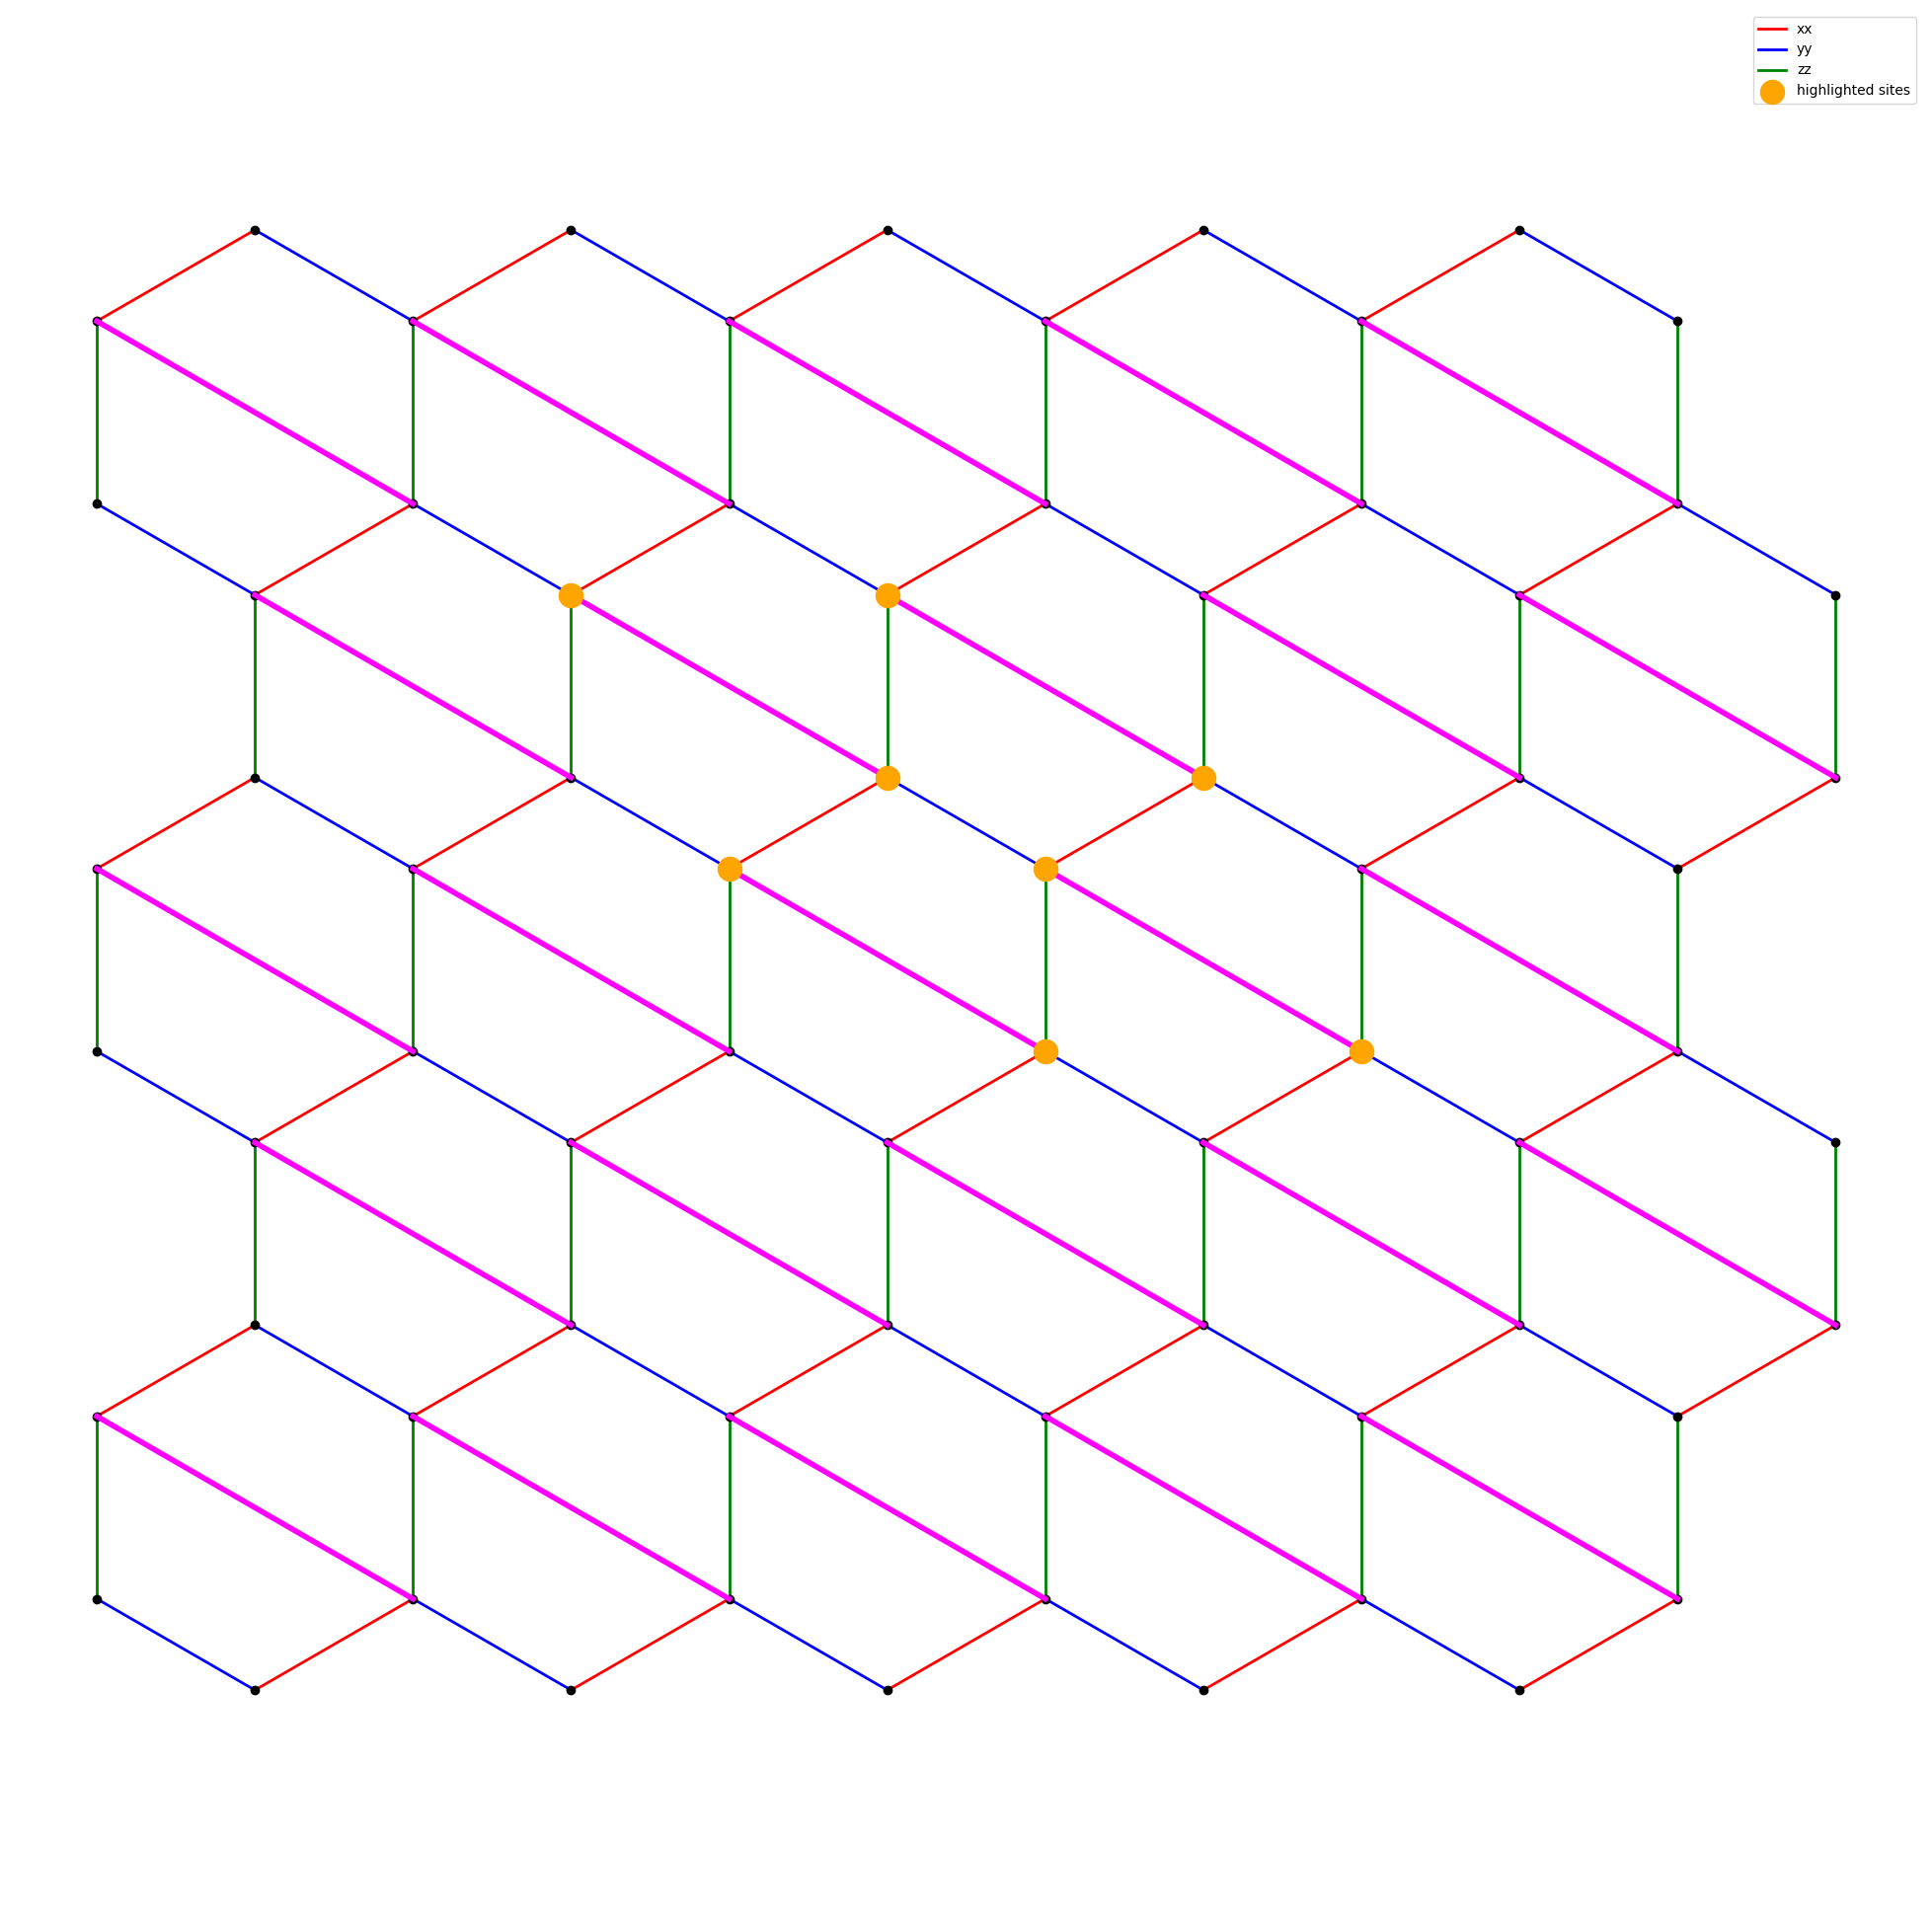

In [239]:
modell = site.SitesOBC(Npx = 5, Npy = 5)
plot_honeycomb(modell, plot_diagonal_bonds=True)

In [240]:
coords = model.get_coordinates()
print("Coordinates of sites: ", coords)

id 0 idx 0 idy 0
x 0.0 y -0.0
id 1 idx 1 idy 0
x 0.8660254037844386 y 0.5
id 2 idx 2 idy 0
x 1.7320508075688772 y -0.0
id 3 idx 3 idy 0
x 2.598076211353316 y 0.5
id 4 idx 4 idy 0
x 3.4641016151377544 y -0.0
id 5 idx 5 idy 0
x 4.330127018922193 y 0.5
id 6 idx 6 idy 0
x 5.196152422706632 y -0.0
id 7 idx 7 idy 0
x 6.06217782649107 y 0.5
id 8 idx 8 idy 0
x 6.928203230275509 y -0.0
id 9 idx 9 idy 0
x 7.794228634059947 y 0.5
id 10 idx 10 idy 0
x 8.660254037844386 y -0.0
id 11 idx 0 idy 1
x 0.0 y -1.0
id 12 idx 1 idy 1
x 0.8660254037844386 y -1.5
id 13 idx 2 idy 1
x 1.7320508075688772 y -1.0
id 14 idx 3 idy 1
x 2.598076211353316 y -1.5
id 15 idx 4 idy 1
x 3.4641016151377544 y -1.0
id 16 idx 5 idy 1
x 4.330127018922193 y -1.5
id 17 idx 6 idy 1
x 5.196152422706632 y -1.0
id 18 idx 7 idy 1
x 6.06217782649107 y -1.5
id 19 idx 8 idy 1
x 6.928203230275509 y -1.0
id 20 idx 9 idy 1
x 7.794228634059947 y -1.5
id 21 idx 10 idy 1
x 8.660254037844386 y -1.0
id 22 idx 11 idy 1
x 9.526279441628825 y -1.5
i

### Fermionic representation of many wonderful things

In [241]:
import free_fermion_representation as f
importlib.reload(f)
import pandas as pd

In [242]:
model = site.SitesOBC(Npx=5, Npy=5)
fgs = f.FermionicGaussianRepresentation(model)
print(model.Nsites)

70


# Topological Order Parameter

In [243]:
indices = [14,16,27,28,29,30,41,43]
# loop = [1 if i in indices else 0 for i in range(model.Nsites)]
loop = np.zeros(model.Nsites)
loop[indices] = 1  # sets all specified indices to 1

print(loop)

print(fgs.expectation_val_Majorana_string(loop))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[False False False False False False False False False False False False
 False False  True False  True False False False False False False False
 False False False  True  True  True  True False False False False False
 False False False False False  True False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False]
(-1+0j)


In [ ]:
# np.set_printoptions(threshold=np.inf)
# print(fgs.Cov)
diagbonds = model.get_diagonalbonds()

for i,j in diagbonds:
    print(fgs.Cov[i,j])
    print(fgs.Cov[j,i])

(2+0j)
(-2+0j)
(2+0j)
(-2+0j)
(2+0j)
(-2+0j)
(2+0j)
(-2+0j)
(2+0j)
(-2+0j)
(2+0j)
(-2+0j)
(2+0j)
(-2+0j)
(2+0j)
(-2+0j)
(2+0j)
(-2+0j)
(2+0j)
(-2+0j)
(2+0j)
(-2+0j)
(2+0j)
(-2+0j)
(2+0j)
(-2+0j)
(2+0j)
(-2+0j)
(2+0j)
(-2+0j)
(2+0j)
(-2+0j)
(2+0j)
(-2+0j)
(2+0j)
(-2+0j)
(2+0j)
(-2+0j)
(2+0j)
(-2+0j)
(2+0j)
(-2+0j)
(2+0j)
(-2+0j)
(2+0j)
(-2+0j)
(2+0j)
(-2+0j)
(2+0j)
(-2+0j)


We define $\tilde{U}(T) = exp(2i \frac{T}{3}H_{0x})exp(2i \frac{T}{3}H_{0y})exp(2i \frac{T}{3}H_{0z})$

In [ ]:
from scipy.linalg import expm

T = 1.

Utilde = expm(2*1j*T*H0_x/3.)*expm(2*1j*T*H0_y/3.)*expm(2*1j*T*H0_z/3.)

In [ ]:
eigvals, eigvecs = np.linalg.eig(Utilde)

In [ ]:
print(eigvals)

[2.67315964+0.j 2.67315964+0.j 2.67315964+0.j 2.67315964+0.j
 2.67315964+0.j 0.77747589+0.j 0.77747589+0.j 0.77747589+0.j
 0.77747589+0.j 0.77747589+0.j 2.94948533+0.j 2.94948533+0.j
 2.94948533+0.j 2.94948533+0.j 2.94948533+0.j 0.77747589+0.j
 0.77747589+0.j 0.77747589+0.j 0.77747589+0.j 0.77747589+0.j
 2.94948533+0.j 2.94948533+0.j 2.94948533+0.j 2.94948533+0.j
 2.94948533+0.j 0.70463723+0.j 0.70463723+0.j 0.70463723+0.j
 0.70463723+0.j 0.70463723+0.j 0.70463723+0.j 0.70463723+0.j
 0.70463723+0.j 0.70463723+0.j 0.70463723+0.j 2.94948533+0.j
 2.94948533+0.j 2.94948533+0.j 2.94948533+0.j 2.94948533+0.j
 0.77747589+0.j 0.77747589+0.j 0.77747589+0.j 0.77747589+0.j
 0.77747589+0.j 2.94948533+0.j 2.94948533+0.j 2.94948533+0.j
 2.94948533+0.j 2.94948533+0.j 0.77747589+0.j 0.77747589+0.j
 0.77747589+0.j 0.77747589+0.j 0.77747589+0.j 2.67315964+0.j
 2.67315964+0.j 2.67315964+0.j 2.67315964+0.j 2.67315964+0.j]
